# Lab 1: Osnovna obrada teksta i označavanje vrsta riječi (POS Tagging)

## Ciljevi
Cilj ove vježbe je upoznati vas s osnovnim principima **obrade prirodnog jezika (NLP)** i praktičnim tehnikama koje se koriste za analizu tekstova. Nakon završetka vježbe trebali biste moći:

- Razumjeti osnovne korake obrade teksta u NLP-u, uključujući čišćenje podataka, tokenizaciju, lematizaciju i uklanjanje stop-riječi.
- Koristiti biblioteke `spaCy` i `NLTK` za praktičnu obradu teksta u Pythonu, uključujući prepoznavanje gramatičkih kategorija riječi.
- Izvesti **normalizaciju teksta** kako bi podaci bili pripremljeni za analizu, što uključuje uklanjanje neželjenih znakova, pretvaranje riječi u osnovni oblik i filtriranje riječi iz bilo kojeg izvora.
- Primijeniti **POS tagging** na uzorke tekstova i analizirati dobivene rezultate kako biste razumjeli strukturu jezika u tekstu.

## Očekivani ishod
Nakon vježbe, moći ćete:

- Objasniti što znače osnovni NLP pojmovi kao što su tokenizacija, lematizacija, stemming i POS tagging, te zašto su važni u obradi jezika.
- Pripremiti tekstualne podatke za analizu, uključujući njihovo čišćenje i transformaciju u format pogodan za daljnju obradu.
- Izvesti analizu vrsta riječi u tekstu i interpretirati statistike, poput broja imenica, glagola ili pridjeva, te razumjeti kakve informacije to daje o stilu i sadržaju teksta.
- Usporediti rezultate dobivene različitim alatima (`spaCy` vs `NLTK`) i razumjeti prednosti i ograničenja svakog pristupa.
- Steći temelj za naprednije NLP zadatke, kao što su analiza sentimenta (prepoznavanje tona u jeziku), prepoznavanje entiteta ili parsiranje rečenica.




---



## Instalacija potrebnih biblioteka

Koristit ćemo `spaCy` i `NLTK`, dvije najčešće korištene NLP biblioteke u Pythonu.

Web stranice:
- [Spacy 101](https://spacy.io/usage/spacy-101)
- [NTLK](https://www.nltk.org/)

`spaCy` ima unaprijed trenirane modele za različite jezike, što znači da odmah možete obraditi tekstove bez dodatnog treniranja vlastitih modela. Njegovi modeli uključuju sve od tokenizacije, lematizacije i POS tagiranja, do naprednijih funkcionalnosti poput prepoznavanja entiteta (NER) i parsiranja rečenica. spaCy je optimiziran za brzinu i praktičnu primjenu, pa se često koristi u industriji i istraživačkim projektima gdje su važni performanse i preciznost.

S druge strane, `NLTK` je prvenstveno edukacijski alat koji služi kao uvod u obradu prirodnog jezika i osnovne algoritme. Pruža veliki broj klasičnih metoda i korpusa, uključujući tokenizaciju, stemming, lematizaciju, POS tagiranje i različite tekstualne korpuse za eksperimentiranje. NLTK je vrlo pogodan za učenje i razumijevanje principa NLP-a, ali za stvarne produkcijske zadatke često je sporiji i manje precizan u odnosu na spaCy, posebno na velikim količinama podataka.



In [1]:
# dependencies
!pip install -q -U spacy nltk matplotlib

# small English language model for spaCy
!python -m spacy download en_core_web_sm

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 11.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 36.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 69.8 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [2]:
import nltk, spacy
print("spaCy version:", spacy.__version__)
print("NLTK version:", nltk.__version__)

spaCy version: 3.8.11
NLTK version: 3.9.2


In [3]:
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_eng.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_rus to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |  

True

## Što je NLP?
NLP (Natural Language Processing) je područje umjetne inteligencije koje se bavi razumijevanjem, obradom i generiranjem ljudskog jezika pomoću računala.

## Ključni koraci obrade teksta:
1. **Čišćenje i normalizacija teksta** – uklanjanje nepotrebnih znakova, brojeva, simbola.
2. **Tokenizacija** – razbijanje teksta na manje jedinice (tokene).
3. **Uklanjanje stop-riječi** – riječi bez informacijske vrijednosti (npr. "and", "the", "is").
4. **Lematizacija** – pretvaranje riječi u osnovni oblik (npr. "running" u "run").
5. **POS tagging** – označavanje svake riječi prema gramatičkoj kategoriji (imenica, glagol, pridjev...).

## Učitavanje uzorka teksta


In [4]:
nlp = spacy.load("en_core_web_sm")

text = """Artificial intelligence is transforming industries across the world.
It enables machines to learn from data, recognize patterns, and make decisions
with minimal human intervention. However, ethical concerns continue to grow."""
doc = nlp(text)

## Tokenizacija, lematizacija i POS tagging u spaCy biblioteci

POS (Part-of-Speech) tagging je proces dodjeljivanja gramatičke oznake svakoj riječi.  
Primjeri oznaka:
- NOUN – imenica
- VERB – glagol
- ADJ – pridjev
- ADV – prilog
- PRON – zamjenica

U spaCy-ju svaka riječ ima dvije oznake:
- `pos_`: šira gramatička kategorija, vrsta riječi
- `tag_`: detaljna oznaka prema Penn Treebank standardu

Primijetite da spaCy automatski radi POS tagging prilikom obrade teksta.


In [5]:
for token in doc:
    print(f"{token.text:<15} | {token.lemma_:<15} | {token.pos_:<15} | {token.tag_:<10} | {token.is_stop}")

Artificial      | artificial      | ADJ             | JJ         | False
intelligence    | intelligence    | NOUN            | NN         | False
is              | be              | AUX             | VBZ        | True
transforming    | transform       | VERB            | VBG        | False
industries      | industry        | NOUN            | NNS        | False
across          | across          | ADP             | IN         | True
the             | the             | DET             | DT         | True
world           | world           | NOUN            | NN         | False
.               | .               | PUNCT           | .          | False

               | 
               | SPACE           | _SP        | False
It              | it              | PRON            | PRP        | True
enables         | enable          | VERB            | VBZ        | False
machines        | machine         | NOUN            | NNS        | False
to              | to              | PART            | T

## Razlika između *stemming*-a i lematizacije

U ovom primjeru vidjet ćete razliku između **stemminga** i **lematizacije** koristeći NLTK i spaCy.  
Primijetit ćete da stemming ponekad daje neprirodne oblike riječi, dok lematizacija vraća gramatički ispravne osnovne oblike.


In [6]:
from nltk.stem import PorterStemmer, WordNetLemmatizer

# primjer
words = ["running", "studies", "better", "cars", "went", "flying"]

# Stemming pomoću NLTK PorterStemmer
stemmer = PorterStemmer()
stemmed_words = [stemmer.stem(word) for word in words]

# Lematizacija pomoću NLTK WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
lemmatized_words_nltk = [lemmatizer.lemmatize(word) for word in words]

# Lematizacija pomoću spaCy
nlp = spacy.load("en_core_web_sm")
doc = nlp(" ".join(words))
lemmatized_words_spacy = [token.lemma_ for token in doc]

print("Originalne riječi:     ", words)
print("Stemming (NLTK):       ", stemmed_words)
print("Lematizacija (NLTK):   ", lemmatized_words_nltk)
print("Lematizacija (spaCy):  ", lemmatized_words_spacy)


Originalne riječi:      ['running', 'studies', 'better', 'cars', 'went', 'flying']
Stemming (NLTK):        ['run', 'studi', 'better', 'car', 'went', 'fli']
Lematizacija (NLTK):    ['running', 'study', 'better', 'car', 'went', 'flying']
Lematizacija (spaCy):   ['run', 'study', 'well', 'car', 'went', 'fly']


## Filtriranje tokena

Sada ćemo iz početnog teksta ukloniti:
- stop-riječi (poput "is", "the", "to")
- interpunkciju
- brojeve

Ostat će samo lematizirani, čisti tokeni koji nose semantičku vrijednost.


In [7]:
doc = nlp(text)

clean_tokens = [token.lemma_.lower() for token in doc
                if not token.is_stop and token.is_alpha]

print(clean_tokens)

['artificial', 'intelligence', 'transform', 'industry', 'world', 'enable', 'machine', 'learn', 'datum', 'recognize', 'pattern', 'decision', 'minimal', 'human', 'intervention', 'ethical', 'concern', 'continue', 'grow']


## Statistička analiza POS oznaka

Možemo analizirati koliko ima imenica, glagola, pridjeva itd.  
Takva statistika daje uvid u strukturu teksta – primjerice, tehnički tekst ima više imenica i manje pridjeva.


Counter({'NOUN': 9, 'VERB': 7, 'PUNCT': 6, 'ADJ': 4, 'ADP': 3, 'SPACE': 2, 'PART': 2, 'AUX': 1, 'DET': 1, 'PRON': 1, 'CCONJ': 1, 'ADV': 1})


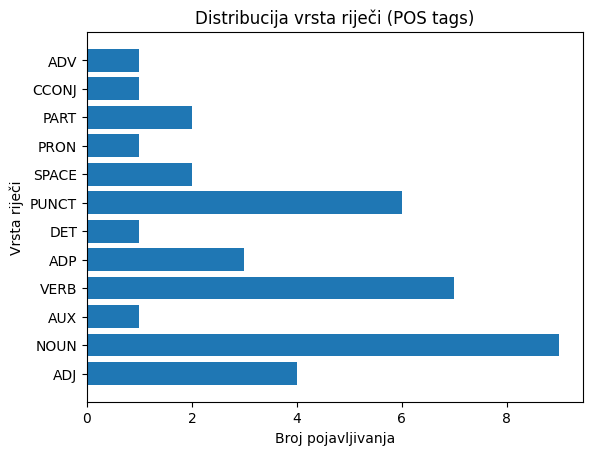

In [8]:
from collections import Counter
import matplotlib.pyplot as plt

pos_counts = Counter([token.pos_ for token in doc])
print(pos_counts)

plt.barh(pos_counts.keys(), pos_counts.values())
plt.title("Distribucija vrsta riječi (POS tags)")
plt.ylabel("Vrsta riječi")
plt.xlabel("Broj pojavljivanja")
plt.show()

## Usporedba sa NLTK

Biblioteka **NLTK (Natural Language Toolkit)** bila je jedan od prvih ozbiljnih alata za rad s prirodnim jezikom u Pythonu i dugo je služila kao standard u akademskim okruženjima.  
NLTK ima vlastitu implementaciju POS taggera koja koristi **Penn Treebank oznake** – to je skup standardiziranih kratkih oznaka (npr. `NN` za imenice, `VB` za glagole, `JJ` za pridjeve). Ove oznake potječu iz jednog od najpoznatijih lingvističkih korpusa na engleskom jeziku.

U ovoj vježbi koristimo NLTK-ov ugrađeni tagger `averaged_perceptron_tagger`, koji se temelji na statističkoj metodi perceptrona i radi vrlo brzo, ali nije uvijek dosljedan u svim kontekstima. Za kraće tekstove je sasvim dovoljan.

Kad usporedite rezultate **spaCyja** i **NLTK-a**, primijetit ćete da se oznake ponekad ne poklapaju. To je posljedica nekoliko razlika u načinu rada ovih alata:

- **Tokenizacija**: spaCy koristi vlastiti tokenizator koji prepoznaje skraćenice, brojeve i interpunkciju inteligentnije od NLTK-ovog osnovnog tokenizatora.  
- **Modeli**: spaCy koristi unaprijed trenirani model temeljen na modernijim metodama (npr. kontekstualni vektori i neuronske mreže), dok NLTK koristi starije, *rule-based* i statističke pristupe.  
- **Oznake i korpusi**: iako se oba oslanjaju na Penn Treebank sustav, implementacije se razlikuju jer su modeli trenirani na različitim verzijama i podskupovima korpusa.  



In [9]:
from nltk import pos_tag, word_tokenize

tokens = word_tokenize(text)
nltk_tags = pos_tag(tokens)

# spaCy
spacy_tags = [(token.text, token.pos_) for token in doc]

print("Usporedba NLTK i spaCy tagova:")
print("-" * 50)
print(f"{'Word':<15} | {'NLTK Tag':<10} | {'spaCy Tag':<10}")
print("-" * 50)

# Primijetite da se tagovi ponekad razlikuju ovisno o tome koju biblioteku koristimo
spacy_tag_dict = {token.text: token.tag_ for token in doc}

for word, nltk_tag in nltk_tags:
    spacy_tag = spacy_tag_dict.get(word, "N/A")
    print(f"{word:<15} | {nltk_tag:<10} | {spacy_tag:<10}")

Usporedba NLTK i spaCy tagova:
--------------------------------------------------
Word            | NLTK Tag   | spaCy Tag 
--------------------------------------------------
Artificial      | JJ         | JJ        
intelligence    | NN         | NN        
is              | VBZ        | VBZ       
transforming    | VBG        | VBG       
industries      | NNS        | NNS       
across          | IN         | IN        
the             | DT         | DT        
world           | NN         | NN        
.               | .          | .         
It              | PRP        | PRP       
enables         | VBZ        | VBZ       
machines        | NNS        | NNS       
to              | TO         | TO        
learn           | VB         | VB        
from            | IN         | IN        
data            | NNS        | NNS       
,               | ,          | ,         
recognize       | NN         | VB        
patterns        | NNS        | NNS       
,               | ,        

### Primijetite da je NLTK prepoznao riječ 'recognize' kao imenicu, dok je spaCy prepoznao da je to glagol.

## Pomoćne funkcije za zadatke

In [10]:
import requests
import re

def fetch_html(url, filename):
    response = requests.get(url)
    response.encoding = 'utf-8'
    with open(filename, 'w', encoding='utf-8') as f:
        f.write(response.text)
    return response.text

def load_html(filename):
    with open(filename, 'r', encoding='utf-8') as f:
        return f.read()

def strip_tags(text):
    return re.sub('<[^<]+?>', '', text).strip()

def clean_and_split(text):
    text = re.sub(r'>(\s*)<', '> <', text)
    text = re.sub(r'<.*?>', '', text)
    text = re.sub(r'\s+', ' ', text)
    return text.strip()


## Zadatak 1

Preuzmi HTML sadržaj s poveznice [https://www.coursera.org/articles/natural-language-processing](https://www.coursera.org/articles/natural-language-processing) koristeći Python biblioteku `requests`. Zatim, pomoću regularnih izraza (*regex*-a), pronađi i prebroji koliko puta se pojavljuju riječi **NLP** i fraza **natural language** (ignoriraj velika/mala slova). Prebroji koliko puta se u tekstu pojavljuju HTML tagovi `<h1>`, `<h2>`, `<h3>` i `<p>`. Na kraju, pronađi i prebroji koliko eksternih referenci postoji tako da izvučeš sve linkove (https://...). Sve rezultate ispiši na ekranu. Pomoćne funkcije nalaze se u ćeliji iznad.

In [11]:
url = "https://www.coursera.org/articles/natural-language-processing"
filename = "article.html"

# Dohvaćanje HTML-a sa stranice i spremanje na disk
html = fetch_html(url, filename)

In [27]:
import re

def strip_tags(text):
    return re.sub('<[^<]+?>', '', text).strip()

def clean_and_split(text):
    text = re.sub(r'>(\s*)<', '> <', text)
    text = re.sub(r'<.*?>', '', text)
    text = re.sub(r'\s+', ' ', text)
    return text.strip()
clean_text_for_words = clean_and_split(html)

nlp_count = len(re.findall(r'nlp', clean_text_for_words, re.IGNORECASE))
natural_language_count = len(re.findall(r'natural language', clean_text_for_words, re.IGNORECASE))

print(f"Broj pojavljivanja riječi 'NLP': {nlp_count}")
print(f"Broj pojavljivanja fraze 'natural language': {natural_language_count}")

h1_count = len(re.findall(r'<h1', html, re.IGNORECASE))
h2_count = len(re.findall(r'<h2', html, re.IGNORECASE))
h3_count = len(re.findall(r'<h3', html, re.IGNORECASE))
p_count = len(re.findall(r'<p', html, re.IGNORECASE))

print(f"Broj pojavljivanja <h1> tagova: {h1_count}")
print(f"Broj pojavljivanja <h2> tagova: {h2_count}")
print(f"Broj pojavljivanja <h3> tagova: {h3_count}")
print(f"Broj pojavljivanja <p> tagova: {p_count}")

#external_links = re.findall(r'href="https://\S+"', html)
external_links = re.findall(r'href=["\']https://[^"\']+', html, re.IGNORECASE)
external_links_count = len(external_links)

print(f"Broj eksternih referenci (https://): {external_links_count}")

Broj pojavljivanja riječi 'NLP': 101
Broj pojavljivanja fraze 'natural language': 55
Broj pojavljivanja <h1> tagova: 1
Broj pojavljivanja <h2> tagova: 6
Broj pojavljivanja <h3> tagova: 17
Broj pojavljivanja <p> tagova: 122
Broj eksternih referenci (https://): 181


## Zadatak 2

Učitaj HTML sadržaj članka koji si prethodno preuzeo (ili koristi istu tekstualnu varijablu). Uz pomoć custom funkcija za parsiranje i čišćenje teksta, izdvoji glavni naslov članka (element `<h1>`), sve podnaslove (`<h2>` i `<h3>`) te tekst iz svih paragrafa (`<p>`). Paragrafe spoji u jedan cjeloviti string tako da koristiš novi red kao separator i ispiši prvih 500 znakova rezultirajućeg teksta. Pronađi i ispiši prvih pet stavki nabrajanja (element `<li>`), ako postoje. Sve tražene podatke ispiši na ekranu.


In [ ]:
filename = "article.html"
html = load_html(filename)

In [26]:
from bs4 import BeautifulSoup

filename = "article.html"
html = load_html(filename)

def get_soup(html: str) -> BeautifulSoup:
    """Vrati BeautifulSoup objekt iz HTML stringa."""
    return BeautifulSoup(html, "html.parser")


def get_main_heading(soup: BeautifulSoup) -> str:
    """Vrati tekst glavnog naslova (<h1>) ili 'N/A' ako ne postoji."""
    h1 = soup.find("h1")
    if h1:
        return h1.get_text(" ", strip=True)
    return "N/A"


def get_subheadings(soup: BeautifulSoup):
    """
    Vrati listu svih <h2> i <h3> naslova.
    Rezultat je dict: {"h2": [...], "h3": [...]}
    """
    h2_list = [h.get_text(" ", strip=True) for h in soup.find_all("h2")]
    h3_list = [h.get_text(" ", strip=True) for h in soup.find_all("h3")]
    return {"h2": h2_list, "h3": h3_list}


def get_paragraphs(soup: BeautifulSoup):
    """Vrati listu tekstova iz svih <p> elemenata."""
    return [p.get_text(" ", strip=True) for p in soup.find_all("p")]


def get_list_items(soup: BeautifulSoup, n: int = 5):
    """Vrati prvih n stavki nabrajanja (<li>), ako postoje."""
    li_elements = soup.find_all("li")
    return [li.get_text(" ", strip=True) for li in li_elements[:n]]

soup = get_soup(html)

main_heading = get_main_heading(soup)
subheadings = get_subheadings(soup)
paragraphs = get_paragraphs(soup)
list_items = get_list_items(soup, n=5)

full_text = "\n".join(paragraphs)
first_500_chars = full_text[:500]

print("--------------------------------------------------")
print("Zadatak 2: Ekstrakcija naslova i teksta iz HTML članka")
print("--------------------------------------------------")
print(f"Datoteka: {filename}")

print("\n--- Glavni naslov članka (<h1>) ---")
print(main_heading)

print("\n--- Podnaslovi (<h2>) ---")
if subheadings["h2"]:
    for i, h2 in enumerate(subheadings["h2"], start=1):
        print(f"[H2 #{i}] {h2}")
else:
    print("Nema pronađenih <h2> naslova.")

print("\n--- Podnaslovi (<h3>) ---")
if subheadings["h3"]:
    for i, h3 in enumerate(subheadings["h3"], start=1):
        print(f"[H3 #{i}] {h3}")
else:
    print("Nema pronađenih <h3> naslova.")

print("\n--- Spojeni tekst paragrafa (<p>) – prvih 500 znakova ---")
print(first_500_chars)

print("\n--- Prvih pet stavki nabrajanja (<li>) ---")
if list_items:
    for i, li in enumerate(list_items, start=1):
        print(f"[LI #{i}] {li}")
else:
    print("Nema pronađenih stavki nabrajanja (<li>).")





--------------------------------------------------
Zadatak 2: Ekstrakcija naslova i teksta iz HTML članka
--------------------------------------------------
Datoteka: article.html

--- Glavni naslov članka (<h1>) ---
What is Natural Language Processing? Definition and Examples

--- Podnaslovi (<h2>) ---
[H2 #1] Natural language processing definition
[H2 #2] Natural language processing examples
[H2 #3] Natural language processing applications
[H2 #4] Natural language processing tools
[H2 #5] Learn about natural language processing on Coursera
[H2 #6] Article sources

--- Podnaslovi (<h3>) ---
[H3 #1] 
[H3 #2] What are NLP techniques?
[H3 #3] NLP benefits
[H3 #4] NLP limitations
[H3 #5] 
[H3 #6] What about ChatGPT?
[H3 #7] 1. Voice-activated assistants
[H3 #8] 2. Machine translation
[H3 #9] 3. Sentiment analysis
[H3 #10] 4. Chatbots and virtual customer support
[H3 #11] 5. Content recommendation systems
[H3 #12] 6. Speech recognition
[H3 #13] 7. Natural language generation (NLG)
[H3 #14]

## Zadatak 3

Analiziraj tekst članka s pomoću `spaCy` biblioteke. Filtriraj tokene (bez stopwords, interpunkcije i praznih), prikaži tablicu za prvih 30 tokena (riječ, lema, POS), ispiši broj svih riječi, jedinstvenih riječi i rečenica. Prikaži tri najčešća POS taga i nacrtaj bar chart njihovih frekvencija. Koristi definirane funkcije za dohvat i čišćenje teksta.


In [ ]:
import spacy
from collections import Counter
import matplotlib.pyplot as plt

filename = "article.html"
html = load_html(filename)

--------------------------------------------------
Zadatak 3: Analiza teksta članka pomoću spaCy
--------------------------------------------------
Datoteka: article.html

--- Prvih 30 filtriranih tokena (riječ, lema, POS) ---
Riječ               Lema                POS       
--------------------------------------------------
face                face                NOUN      
font                font                ADJ       
family              family              NOUN      
coursera            coursera            NOUN      
iconfont            iconfont            ADJ       
src                 src                 NOUN      
web                 web                 NOUN      
bundles             bundle              NOUN      
styleguide          styleguide          NOUN      
icons               icon                NOUN      
fonts               font                NOUN      
src                 src                 NOUN      
web                 web                 NOUN      
bundles 

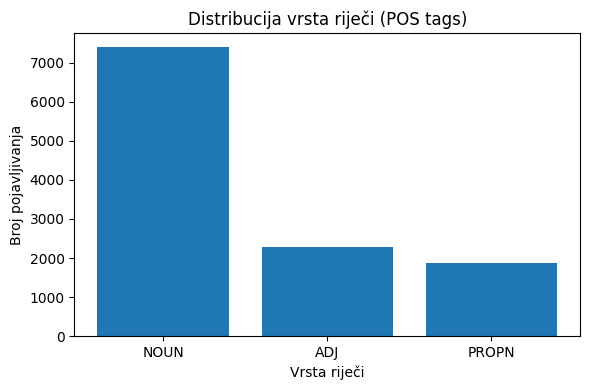


Zadatak 3 uspješno je završen!
--------------------------------------------------


In [25]:
import spacy
from collections import Counter
import matplotlib.pyplot as plt

filename = "article.html"
html = load_html(filename)

text = clean_and_split(html)

nlp = spacy.load("en_core_web_sm")

doc = nlp(text)

def filter_tokens(doc):
    """
    Filtrira tokene tako da zadrži samo:
    - riječi (is_alpha),
    - koje nisu stop riječi,
    - koje nisu interpunkcija,
    - koje nisu prazne.
    Vraća listu spaCy tokena.
    """
    return [
        token
        for token in doc
        if token.is_alpha
        and not token.is_stop
        and not token.is_punct
        and token.text.strip()
    ]

clean_tokens = filter_tokens(doc)

print("--------------------------------------------------")
print("Zadatak 3: Analiza teksta članka pomoću spaCy")
print("--------------------------------------------------")
print(f"Datoteka: {filename}")

print("\n--- Prvih 30 filtriranih tokena (riječ, lema, POS) ---")
print(f"{'Riječ':<20}{'Lema':<20}{'POS':<10}")
print("-" * 50)
for token in clean_tokens[:30]:
    print(f"{token.text:<20}{token.lemma_:<20}{token.pos_:<10}")

total_words = len(clean_tokens)

unique_words = len(set([t.lemma_.lower() for t in clean_tokens]))

sentences = list(doc.sents)
num_sentences = len(sentences)

print("\n--- Statistika teksta ---")
print(f"Broj svih riječi (filtriranih tokena): {total_words}")
print(f"Broj jedinstvenih riječi (preko leme): {unique_words}")
print(f"Broj rečenica u tekstu: {num_sentences}")

pos_counts = Counter([token.pos_ for token in clean_tokens])

top3_pos = pos_counts.most_common(3)

print("\n--- Tri najčešća POS taga ---")
for pos_tag, freq in top3_pos:
    print(f"{pos_tag:<10}: {freq}")

labels = [item[0] for item in top3_pos]
values = [item[1] for item in top3_pos]

plt.figure(figsize=(6, 4))
plt.bar(labels, values)
plt.title("Distribucija vrsta riječi (POS tags)")
plt.xlabel("Vrsta riječi")
plt.ylabel("Broj pojavljivanja")
plt.tight_layout()
plt.show()

print("\nZadatak 3 uspješno je završen!")
print("--------------------------------------------------")

## Opcionalno: POS tagging na hrvatskom jeziku
spaCy podržava hrvatski model `hr_core_news_sm`.

Usporedite dosadašnje rezultate s engleskim tekstom.


In [ ]:
!python -m spacy download hr_core_news_sm
import spacy
nlp_hr = spacy.load("hr_core_news_sm")

text_hr = "Umjetna inteligencija mijenja način na koji živimo i radimo."
doc_hr = nlp_hr(text_hr)

for token in doc_hr:
    print(f"{token.text:<15} | lemma: {token.lemma_:<15} | POS: {token.pos_:<10}")


## Zaključak

U ovoj vježbi ste naučili kako se tekst može pripremiti za analizu, odnosno kako ga **normalizirati**, očistiti od nepotrebnih znakova i stop-riječi, te pretvoriti u oblik pogodan za daljnju obradu. Također ste primijenili **POS tagging** pomoću biblioteka spaCy i NLTK i vidjeli kako se svaka riječ može označiti odgovarajućom gramatičkom kategorijom. Na kraju ste naučili **interpretirati rezultate** i dobili uvid u strukturu jezika u tekstu, primjerice, koje vrste riječi prevladavaju i što to govori o stilu i sadržaju teksta.

### Što dalje?
- Analizirajte tekstove različitih domena (npr. vijesti vs. književnost, tehnički tekstovi vs. blogovi) i usporedite njihove POS distribucije kako biste uočili stilističke i sadržajne razlike.
- Napravite **grafičku usporedbu više dokumenata** s obzirom na njihovu POS strukturu, što može pomoći u vizualizaciji dominantnih vrsta riječi i razlikovanju tipova tekstova.
- Istražite razlike između modela za različite jezike ili različite alate za POS tagging kako biste razumjeli kako izbor tehnologije utječe na analizu.
